In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [3]:
from datasets import list_datasets
from datasets import load_dataset

/home/karvsmech/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Exploration into the dataset dict

In [4]:
# all_datasets = list_datasets()
# all_datasets

# print(f'the are {len(all_datasets)} datasets currently in the hugging face hub')
# print(f'the first 10 are: {all_datasets[:10]}')

emotions = load_dataset('emotion')
emotions

train_ids = emotions['train']
train_ids

print(f'the length of the training dataset is: {len(train_ids)}')

train_ids[0]

type(train_ids)

train_ids.column_names

print(train_ids.features)

emotions['train'].features

print(train_ids[:5])

print(train_ids['text'][:5])

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

the length of the training dataset is: 16000


{'text': 'i didnt feel humiliated', 'label': 0}

datasets.arrow_dataset.Dataset

['text', 'label']

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}
['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [5]:
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
# !wget $dataset_url
!wget {dataset_url}


emotions_local = load_dataset('csv', data_files='train.txt', sep=';', names=['text', 'label'])
emotions_local

emotions_local['train'].column_names

emotions_local['train'].features

emotions_local['train'].num_rows

--2024-11-13 05:36:16--  https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt
Resolving huggingface.co (huggingface.co)... 108.159.15.97, 108.159.15.84, 108.159.15.3, ...
Connecting to huggingface.co (huggingface.co)|108.159.15.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658616 (1.6M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   1.58M  1.39MB/s    in 1.1s    

2024-11-13 05:36:18 (1.39 MB/s) - ‘train.txt’ saved [1658616/1658616]



Generating train split: 16000 examples [00:00, 729888.45 examples/s]


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
})

['text', 'label']

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='string', id=None)}

16000

In [6]:
# no need for wget, just use the url directly
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
emotions_local = load_dataset('csv', data_files=dataset_url, sep=';', names=['text', 'label'])
emotions_local

emotions

# convert output format of the dataset
emotions.set_format(type='pandas')

df = emotions['train'][:]
df.head()

type(df)

def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
})

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


pandas.core.frame.DataFrame

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


# looking at the class distribution

surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: label_name, dtype: int64

<Axes: >

Text(0.5, 1.0, 'frequency of classes')

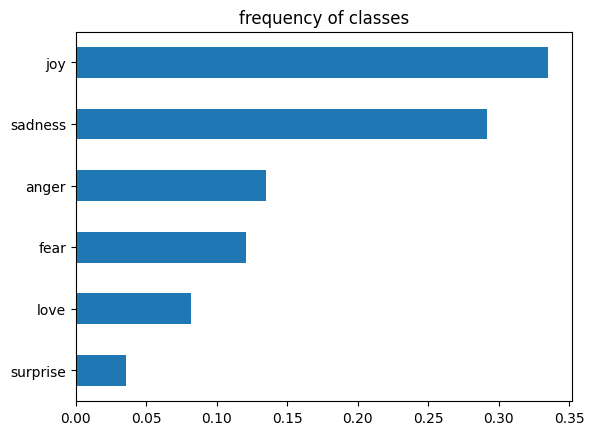

In [18]:
import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True)

df['label_name'].value_counts(ascending=True, normalize=True).plot(kind='barh')
plt.title('frequency of classes')
plt.show()

<Axes: title={'center': 'words_per_tweet'}, xlabel='label_name'>

Text(0.5, 0.98, '')

Text(0.5, 0, '')

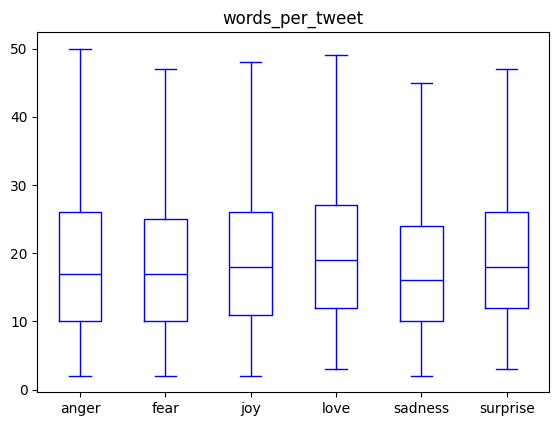

In [28]:
# how many words does our tweets have.
# this is to understand if the tweet lengths will go above the maximum context length of the model.

df['words_per_tweet'] = df['text'].str.split().apply(len)
df.boxplot(column='words_per_tweet', by='label_name', grid=False, showfliers=False, color='blue')
plt.suptitle("")
plt.xlabel("")
plt.show()

In [31]:
# we don't needs pandas Dataframe format anymore.
emotions.reset_format()

type(emotions['train'][:])

dict

In [41]:
# from text to tokens

# character tokenization
text = 'Tokenizing text is a core task of NLP.'
tokenized_text = list(text)
token2idx = {ch:idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [48]:
input_ids = [token2idx[ch] for ch in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]
